**Titanic is one of the most big disaster in the history in 1912. It sank after hitting the iceberg. 2224 passengers and employees are died.**

In [1143]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import os
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [1144]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
test_PassengerID=test_df['PassengerId']

In [1145]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

=>>> There are total 12 columns.

In [1146]:
train_df.head(16)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1147]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [1148]:
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [1149]:
train_df.isnull().sum()*100/train_df.shape[0]

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

We can drop PassengerId, because it is not necessary values.
Cabin column has %77null ratio. So we can drop this column.
Than ticket column is not useful data for dataset.

In [1150]:
train_df.drop(labels = ["PassengerId", "Ticket", "Cabin"], axis = 1, inplace = True)

In [1151]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [1152]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


=>>> mean and %50 value of Age are so similar. There is no skewed distribution.

=>>> mean and %50 value of Pclass are a little similar.

=>>> mean and %50 value of Fare are not so similar. There is a skewed distribution.

In [1153]:
# show the overall survival rate, as the standard when choosing the fts
print('Overall Survival Ratio: %{}'.format(train_df['Survived'].mean()*100))

Overall Survival Ratio: %38.38383838383838


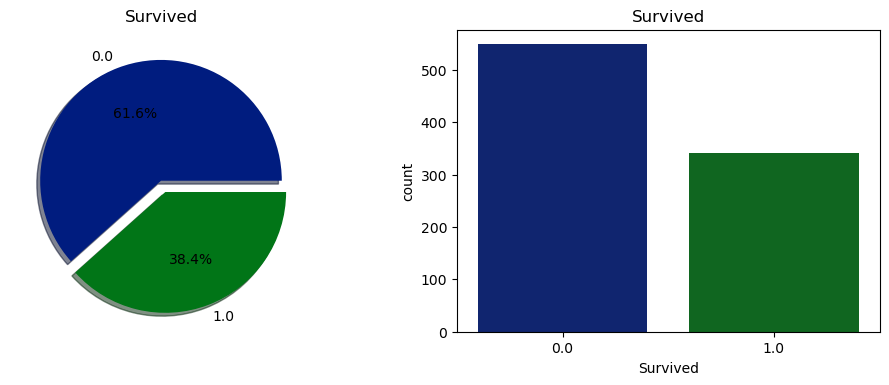

In [1154]:
f,ax=plt.subplots(1,2,figsize=(12,4))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

% 38,4 of passengers are survived, % 61,6 of passengers died.

In [1155]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1308 non-null   float64
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 92.2+ KB


=>>> Dataset has 3 float64, 3 int64, 3 object column dtype.

float64 : Fare and Age

int64: Pclass, SibSp, Parch, PassengerID, and Survived

object : Name, Sex, and Embarked

In [1156]:
train_df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

We have 148 Null Survived,

263 Age,

1 Fare,

2 Embarked values.

In [1157]:
train_df.nunique()

Survived       2
Pclass         3
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Fare         281
Embarked       3
dtype: int64

**Categorical Variable Analysis** : Survived, Pclass, Sex, SibsSp, Parch, Embarked, Name

**Numerical Variable Analysis** : Age, Fare

**Categorical Variable Analysis- Visualize**

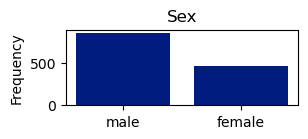

Sex: 
 male      843
female    466
Name: Sex, dtype: int64


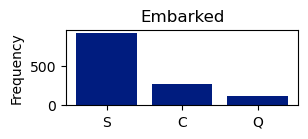

Embarked: 
 S    914
C    270
Q    123
Name: Embarked, dtype: int64


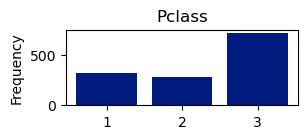

Pclass: 
 3    709
1    323
2    277
Name: Pclass, dtype: int64


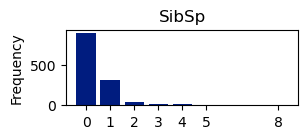

SibSp: 
 0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


In [1158]:
def bar_plot(i):
    var= train_df[i]
    varValue=var.value_counts()
    plt.figure(figsize=(3,1))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()
    print('{}: \n {}'.format(i,varValue))
Firstcategory=[ 'Sex', 'Embarked', 'Pclass', 'SibSp']
for c in Firstcategory:
    bar_plot(c)

**Numerical Variable Analysis - Visualize**

Text(0.5, 1.0, 'Age')

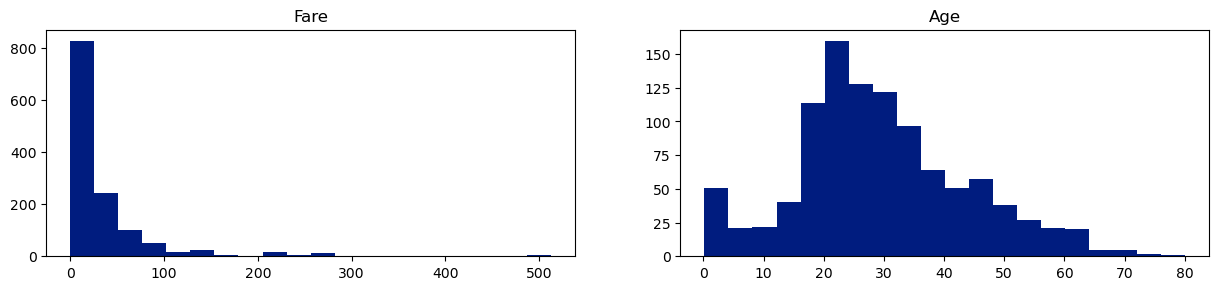

In [1159]:
plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
plt.hist(train_df['Fare'], bins=20)
plt.title("Fare")
plt.subplot(1,2,2)
plt.hist(train_df['Age'], bins=20)
plt.title("Age")

=>>> Age likes positively skewed

In [1160]:
#Pclass vs Survived
print(train_df[['Pclass', 'Survived']].head(10))
print("Survived people ratio groupby Pclass: \n", train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       3       0.0
1       1       1.0
2       3       1.0
3       1       1.0
4       3       0.0
5       3       0.0
6       1       0.0
7       3       0.0
8       3       1.0
9       2       1.0
Survived people ratio groupby Pclass: 
    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


=>>> Ratio of survived passenger is the most value in 1.pclass.

In [1161]:
#Survived people ratio groupby Sex:
print(train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

      Sex  Survived
0  female  0.742038
1    male  0.188908


=>>> Number of survived female passengers are more than survived male passenger.

In [1162]:
#Survived people ratio groupby Siblings/Spouse :
sursibsp=train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sursibsp

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


=>>> Passengers who have 1 sibling/suppose have the most value of survived rate. Passengers that have 5 or 8 sibsp are not survived or there is no possibility of having sibsp.

In [1163]:
#Survived people ratio groupby Parch ( Parent or children) : 
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000
7,9,NaN


=>>> If a passenger has 3 children or parents, the survived rate is highest.

#**Outlier Detection**

**Missing Value**

Find and fill the missing value:

In [1164]:
#Finding missing values:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Embarked'], dtype='object')

In [1165]:
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [1166]:
#Embarked missing
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


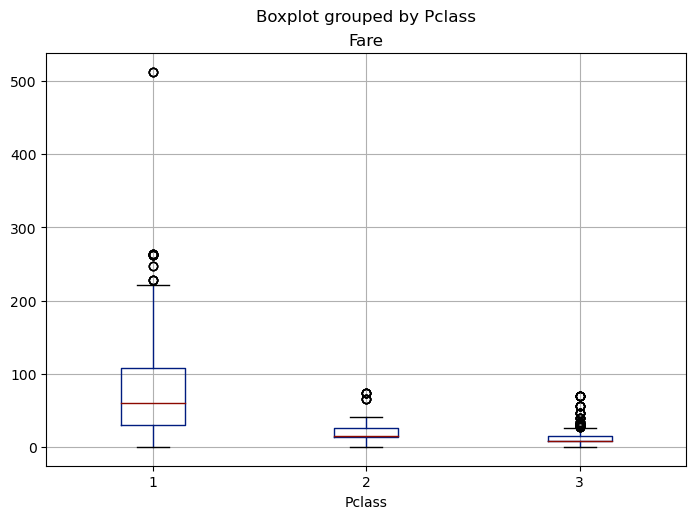

In [1167]:
train_df.boxplot(column='Fare', by='Pclass')
plt.show()

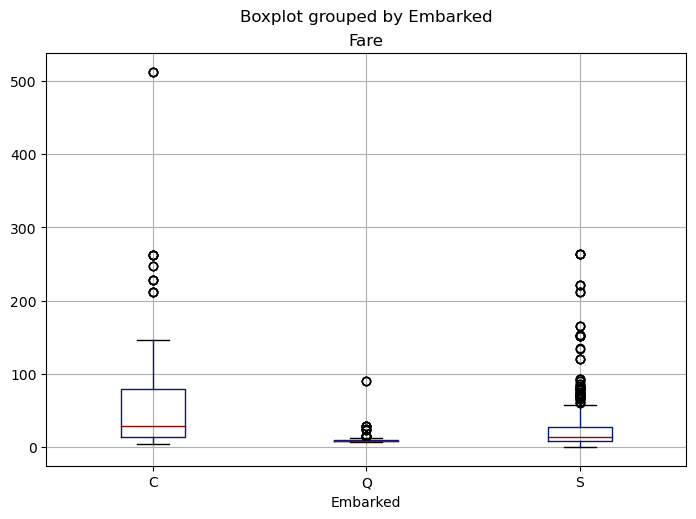

In [1168]:
train_df.boxplot(column='Fare', by='Embarked')
plt.show()

=>>> C embarked has highest fare and so 1 pclass. So, null is filled by "C".

In [1169]:
train_df['Embarked']= train_df['Embarked'].fillna('C')
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [1170]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [1171]:
#Fare missing
train_df[train_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1043,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


=>>> Only one null value of Fare have 3.Pclass. So it is filled mean of Fare of 3.Pclass.

In [1172]:
train_df['Fare']= train_df['Fare'].fillna(np.mean(train_df[train_df['Pclass']==3]['Fare']))
train_df[train_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


We can use get.dummies method for Sex column

In [1173]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Sex"])], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1


In [1174]:
train_df.drop(labels = ["Sex"], axis = 1, inplace = True)

In [1175]:
#Age missing
train_df[train_df['Age'].isnull()]

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female,male
5,0.0,3,"Moran, Mr. James",NaN,0,0,8.4583,Q,0,1
17,1.0,2,"Williams, Mr. Charles Eugene",NaN,0,0,13.0000,S,0,1
19,1.0,3,"Masselmani, Mrs. Fatima",NaN,0,0,7.2250,C,1,0
26,0.0,3,"Emir, Mr. Farred Chehab",NaN,0,0,7.2250,C,0,1
28,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",NaN,0,0,7.8792,Q,1,0
...,...,...,...,...,...,...,...,...,...,...
1299,NaN,3,"Riordan, Miss. Johanna Hannah""""",NaN,0,0,7.7208,Q,1,0
1301,NaN,3,"Naughton, Miss. Hannah",NaN,0,0,7.7500,Q,1,0
1304,NaN,3,"Spector, Mr. Woolf",NaN,0,0,8.0500,S,0,1
1307,NaN,3,"Ware, Mr. Frederick",NaN,0,0,8.0500,S,0,1


We can fill age with mean value of groupby Embarked and female columns.

In [1176]:
train_df['Age'] = train_df['Age'].groupby([train_df['Embarked'], train_df['female']]).apply(lambda x: x.fillna(x.mean()))

In [1177]:
train_df.Age.isnull().sum()

0

We can use getdummies method for Pclass column.

In [1178]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Pclass"])], axis=1)

In [1179]:
train_df.drop(labels = ["Pclass"], axis = 1, inplace = True)
train_df.head()

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,female,male,1,2,3
0,0.0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1,0,0,1
1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1,0,1,0,0
2,1.0,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1,0,0,0,1
3,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1,0,1,0,0
4,0.0,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1,0,0,1


Creating new column as alone, with SibSp column:

In [1180]:
def make_discrete(SibSp):
    if SibSp < 1:
        return 1
    else:
        return 0
train_df['alone'] = train_df['SibSp'].apply(make_discrete)
display(train_df.head())
train_df.groupby("alone")["SibSp"].count()

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,female,male,1,2,3,alone
0,0.0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1,0,0,1,0
1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1,0,1,0,0,0
2,1.0,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1,0,0,0,1,1
3,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1,0,1,0,0,0
4,0.0,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1,0,0,1,1


alone
0    418
1    891
Name: SibSp, dtype: int64

=>>> 891 people are alone.

=>>> 99 people have more than 1 sipsp.

So, we can drop SibSp column.

In [1181]:
train_df.drop(labels = ["SibSp"], axis = 1, inplace = True)
train_df.head()

,Survived,Name,Age,Parch,Fare,Embarked,female,male,1,2,3,alone
0,0.0,"Braund, Mr. Owen Harris",22.0,0,7.2500,S,0,1,0,0,1,0
1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,0,71.2833,C,1,0,1,0,0,0
2,1.0,"Heikkinen, Miss. Laina",26.0,0,7.9250,S,1,0,0,0,1,1
3,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,0,53.1000,S,1,0,1,0,0,0
4,0.0,"Allen, Mr. William Henry",35.0,0,8.0500,S,0,1,0,0,1,1


Modifying Name column as Miss,Mrs, and others prefix.

In [1182]:
train_df["Name"].replace(to_replace='(.*, )|(\\..*)', value='', inplace=True, regex=True)

In [1183]:
train_df["Name"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [1184]:
other_titles = ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Master']
train_df.replace(other_titles, "Others", inplace=True)
train_df.replace(["Mlle","Ms", "Mme"], ["Miss", "Miss", "Mrs"], inplace=True)

In [1185]:
train_df

,Survived,Name,Age,Parch,Fare,Embarked,female,male,1,2,3,alone
0,0.0,Mr,22.000000,0,7.2500,S,0,1,0,0,1,0
1,1.0,Mrs,38.000000,0,71.2833,C,1,0,1,0,0,0
2,1.0,Miss,26.000000,0,7.9250,S,1,0,0,0,1,1
3,1.0,Mrs,35.000000,0,53.1000,S,1,0,1,0,0,0
4,0.0,Mr,35.000000,0,8.0500,S,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,Mr,29.942394,0,8.0500,S,0,1,0,0,1,1
1305,NaN,Others,39.000000,0,108.9000,C,1,0,1,0,0,1
1306,NaN,Mr,38.500000,0,7.2500,S,0,1,0,0,1,1
1307,NaN,Mr,29.942394,0,8.0500,S,0,1,0,0,1,1


In [1186]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Name      1309 non-null   object 
 2   Age       1309 non-null   float64
 3   Parch     1309 non-null   int64  
 4   Fare      1309 non-null   float64
 5   Embarked  1309 non-null   object 
 6   female    1309 non-null   uint8  
 7   male      1309 non-null   uint8  
 8   1         1309 non-null   uint8  
 9   2         1309 non-null   uint8  
 10  3         1309 non-null   uint8  
 11  alone     1309 non-null   int64  
dtypes: float64(3), int64(2), object(2), uint8(5)
memory usage: 78.1+ KB


In [1187]:
#Survived values missing:
train_df[train_df['Survived'].isnull()]

,Survived,Name,Age,Parch,Fare,Embarked,female,male,1,2,3,alone
891,NaN,Mr,34.500000,0,7.8292,Q,0,1,0,0,1,1
892,NaN,Mrs,47.000000,0,7.0000,S,1,0,0,0,1,0
893,NaN,Mr,62.000000,0,9.6875,Q,0,1,0,1,0,1
894,NaN,Mr,27.000000,0,8.6625,S,0,1,0,0,1,1
895,NaN,Mrs,22.000000,1,12.2875,S,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,Mr,29.942394,0,8.0500,S,0,1,0,0,1,1
1305,NaN,Others,39.000000,0,108.9000,C,1,0,1,0,0,1
1306,NaN,Mr,38.500000,0,7.2500,S,0,1,0,0,1,1
1307,NaN,Mr,29.942394,0,8.0500,S,0,1,0,0,1,1


In [1192]:
def surv(Survived):
    if np.isnan(train_df["Survived"][i])==True:
        if train_df[1][i]==0 and train_df["female"][i]==0:
            return 0

        else:
            return 1
train_df["Survived"]=train_df["Survived"].apply(surv)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [1191]:
train_df.tail(10)

,Survived,Name,Age,Parch,Fare,Embarked,female,male,1,2,3,alone
1299,None,Miss,25.458333,0,7.7208,Q,1,0,0,0,1,1
1300,None,Miss,3.000000,1,13.7750,S,1,0,0,0,1,0
1301,None,Miss,25.458333,0,7.7500,Q,1,0,0,0,1,1
1302,None,Mrs,37.000000,0,90.0000,Q,1,0,1,0,0,0
1303,None,Miss,28.000000,0,7.7750,S,1,0,0,0,1,1
1304,None,Mr,29.942394,0,8.0500,S,0,1,0,0,1,1
1305,None,Others,39.000000,0,108.9000,C,1,0,1,0,0,1
1306,None,Mr,38.500000,0,7.2500,S,0,1,0,0,1,1
1307,None,Mr,29.942394,0,8.0500,S,0,1,0,0,1,1
1308,None,Others,33.284386,1,22.3583,C,0,1,0,0,1,0


In [1082]:
train_df["Survived"].unique()

array([None], dtype=object)

In [1083]:
#train_df['Survived'] = train_df['Survived'].groupby([train_df[1], train_df['female']]).apply(lambda x: x.fillna(x.mean()))

train_df['Age'] = train_df['Age'].groupby([train_df['Embarked'], train_df['female']]).apply(lambda x: x.fillna(1))

In [1084]:
#for i in range(len(train_df.index)):
  #  if train_df[1][i]==1:
    #    train_df['Survived'] = np.where(train_df['Survived'].isna() == True,train_df['Survived'],1)

In [1085]:
train_df.tail(10)

,Survived,Name,Age,Parch,Fare,Embarked,female,male,1,2,3,alone
1299,None,Miss,25.458333,0,7.7208,Q,1,0,0,0,1,1
1300,None,Miss,3.000000,1,13.7750,S,1,0,0,0,1,0
1301,None,Miss,25.458333,0,7.7500,Q,1,0,0,0,1,1
1302,None,Mrs,37.000000,0,90.0000,Q,1,0,1,0,0,0
1303,None,Miss,28.000000,0,7.7750,S,1,0,0,0,1,1
1304,None,Mr,29.942394,0,8.0500,S,0,1,0,0,1,1
1305,None,Others,39.000000,0,108.9000,C,1,0,1,0,0,1
1306,None,Mr,38.500000,0,7.2500,S,0,1,0,0,1,1
1307,None,Mr,29.942394,0,8.0500,S,0,1,0,0,1,1
1308,None,Others,33.284386,1,22.3583,C,0,1,0,0,1,0


In [1086]:
train_df.head()

,Survived,Name,Age,Parch,Fare,Embarked,female,male,1,2,3,alone
0,None,Mr,22.0,0,7.2500,S,0,1,0,0,1,0
1,None,Mrs,38.0,0,71.2833,C,1,0,1,0,0,0
2,None,Miss,26.0,0,7.9250,S,1,0,0,0,1,1
3,None,Mrs,35.0,0,53.1000,S,1,0,1,0,0,0
4,None,Mr,35.0,0,8.0500,S,0,1,0,0,1,1


In [1087]:
#Survived missing corralated highly with Pclass
train_df[train_df['Survived'].isnull()]

,Survived,Name,Age,Parch,Fare,Embarked,female,male,1,2,3,alone
0,None,Mr,22.000000,0,7.2500,S,0,1,0,0,1,0
1,None,Mrs,38.000000,0,71.2833,C,1,0,1,0,0,0
2,None,Miss,26.000000,0,7.9250,S,1,0,0,0,1,1
3,None,Mrs,35.000000,0,53.1000,S,1,0,1,0,0,0
4,None,Mr,35.000000,0,8.0500,S,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,None,Mr,29.942394,0,8.0500,S,0,1,0,0,1,1
1305,None,Others,39.000000,0,108.9000,C,1,0,1,0,0,1
1306,None,Mr,38.500000,0,7.2500,S,0,1,0,0,1,1
1307,None,Mr,29.942394,0,8.0500,S,0,1,0,0,1,1


In [1088]:
import seaborn as sns
plt.figure(figsize=(15,5), dpi = 300)
plt.subplot(2,6,1)
sns.countplot(x = 'Age', data = train_df, palette="Set3")


plt.show()

KeyboardInterrupt: 

In [ ]:
train_df.head()

In [ ]:
#sns.barplot(x="Age", y="Fare", data=train_df, hue = 'female')
#plt.show()

In [ ]:
#plt.figure(figsize=(5,3), dpi = 300)
#sns.scatterplot(x="Age", y="Fare", data=train_df, hue = 'Sex')

In [ ]:
#plt.figure(figsize=(5,3), dpi = 200)
#a = sns.scatterplot(x="Fare", y="Embarked", data=train_df)
#plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**UNIVARIATE ANALYSIS**

**Visualization with Univariate Data**\
Visualization of the Numerical Variables

In [ ]:
train_df["winsorize_Fare"] = winsorize(train_df["Fare"], (0, 0.10))
train_df["winsorize_Age"] = winsorize(train_df["Age"], (0, 0.10))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['Fare', 'Age']
winsorize_variables= ['winsorize_Fare', 'winsorize_Age']
plt.figure(figsize=(20,15))
for i in range(2):
    plt.subplot(2, 2, i+1)
    plt.hist(train_df[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(2):
    plt.subplot(2, 2, i+2)
    plt.hist(train_df[winsorize_variables[i]])
    plt.title(winsorize_variables[i], fontdict=title_font)
    
for i in range(2):
    plt.subplot(2, 2, i+3)
    plt.hist(np.log(train_df[variables[i]]+1))
    plt.title(variables[i] + ' (log transformed)')

Visualization of the Categorical Variables

In [ ]:
#!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
categories=['Name','Ticket']
plt.figure(figsize=(20,10))
for i, category in enumerate(categories):
    plt.subplot(1,2,i+1)
    wordcloud = WordCloud(background_color="orange").generate(" ".join(train_df[category].dropna()))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
plt.show()

**Bivariate Analysis of Two Continuous Variables**

In [ ]:
plt.figure(figsize=(18,5))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(train_df["winsorize_Fare"], train_df["winsorize_Age"])
plt.title("Number of Fare & Age", fontdict=title_font)
plt.xlabel('Number of Fare', fontdict=axis_font )
plt.ylabel('Age', fontdict=axis_font )


plt.subplot(1,3,2)
plt.scatter(train_df["winsorize_Age"], train_df["winsorize_PassengerId"])
plt.title("Age & PId", fontdict=title_font)
plt.xlabel('Age', fontdict=axis_font)
plt.ylabel('PId', fontdict=axis_font)

plt.subplot(1,3,3)
plt.scatter(train_df["winsorize_Fare"], train_df["winsorize_PassengerId"])
plt.title("Number of Fare & PId", fontdict=title_font)
plt.xlabel('Number of Fare', fontdict=axis_font )
plt.ylabel('PId', fontdict=axis_font )

plt.show()

=>>> The graphs above tells us that there is no clear pattern between the variables of interest.

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(train_df["Survived"], train_df["winsorize_Age"])
plt.title("Average Age", fontdict = title_font)

plt.subplot(1,3,2)
sns.barplot(train_df["Survived"], train_df["winsorize_Fare"])
plt.title("Average Fare", fontdict = title_font)

plt.subplot(1,3,3)
sns.barplot(train_df["Survived"], train_df["winsorize_PassengerId"])
plt.title("Average PassengerId", fontdict = title_font)

plt.show()

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(train_df["Sex"], train_df["winsorize_Age"])
plt.title("Average Age", fontdict = title_font)

plt.subplot(1,3,2)
sns.barplot(train_df["Sex"], train_df["winsorize_Fare"])
plt.title("Average Fare", fontdict = title_font)

plt.subplot(1,3,3)
sns.barplot(train_df["Sex"], train_df["winsorize_PassengerId"])
plt.title("Average PassengerId", fontdict = title_font)

plt.show()

**t-test**

In [ ]:
train_df.dropna(inplace=True)

In [ ]:
# Test whether group differences are significant.
train_dfs = train_df["Survived"].unique()
grup_train = train_df.groupby("Survived")

In [ ]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["**", "winsorize_Age", "winsorize_Fare"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(train_dfs)):
        for j in range(i+1, len(train_dfs)):
            ttest = stats.ttest_ind(train_df[train_df["Survived"]==train_dfs[i]][var], 
                                train_df[train_df["Survived"]==train_dfs[j]][var])
            group_1 = train_dfs[i]
            group_2 = train_dfs[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

In [ ]:
plt.figure(figsize=(8,5))

age = train_df.Age
fare = train_df.Fare

plt.hist(age, alpha=0.5, label='Age') 
plt.hist(fare, alpha=0.5, label='Fare') 
plt.legend(loc='upper right') 
plt.show()

In [ ]:
plt.figure(figsize=(8,5))

sample1 = np.random.choice(age, 100, replace=True)
sample2 = np.random.choice(fare, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='Sample 1') 
plt.hist(sample2, alpha=0.5, label='Sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [ ]:
print("1. Mean of the sample: ", sample1.mean())
print("2. Mean of the sample : ", sample2.mean())
print("1. Standard deviation of sample: ", sample1.std())
print("2. Standard deviation of sample : ", sample2.std())

In [ ]:
difference = sample2.mean() - sample1.mean()
print(difference)

**Correlation Coefficient**

In [ ]:
train_df_map=train_df.corr()
sns.heatmap(train_df_map, annot=True, fmt='.2f', annot_kws={"size": 6}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix of Titanic", fontdict=title_font)

plt.show()